# Here are some examples of matrix functionality...

In [1]:
import avt

import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Confusion Matrix Plot:

### IRIS Dataset:

Load the data:

In [2]:
data = load_iris()
X, y = data['data'], data['target']

Train a model:

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression().fit(X_train, y_train)
y_test_predict = lr.predict(X_test)

Calculate the confusion matrix:

In [4]:
cfm = confusion_matrix(y_test, y_test_predict)

The confusion matrix looks as follows:

In [5]:
cfm

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  2, 14]], dtype=int64)

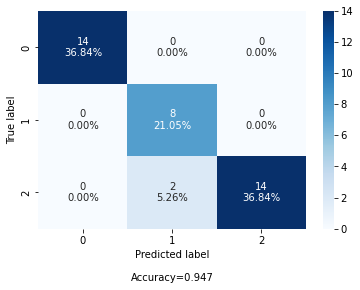

In [6]:
ax = avt.cfmplot(cfm, summary_statistics=True)

# saving graph
ax.figure.savefig('./figures/cfmplot-multi_label.png', bbox_inches='tight')
ax.figure.savefig('../docs/source/figures/cfmplot-multi_label.png', bbox_inches='tight')

### IRIS Dataset Target in `[0,1]`:

Similarly, if we had a binary task:

In [7]:
X, y = data['data'], data['target']
bin_idx = np.isin(y, [0,1])
X, y = X[bin_idx], y[bin_idx]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression().fit(X_train, y_train)
y_test_predict = lr.predict(X_test)

Calculate the confusion matrix:

In [9]:
cfm = confusion_matrix(y_test, y_test_predict)

The confusion matrix looks as follows:

In [10]:
cfm

array([[13,  0],
       [ 0, 12]], dtype=int64)

This time, we also have acces to the precision and recall:

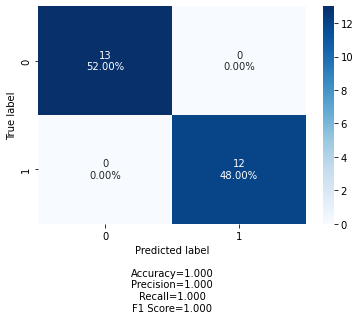

In [11]:
ax = avt.cfmplot(cfm, summary_statistics=True)

# saving graph
ax.figure.savefig('./figures/cfmplot-binary_label.png', bbox_inches='tight')
ax.figure.savefig('../docs/source/figures/cfmplot-binary_label.png', bbox_inches='tight')